# Accessing GroenMonitor data with GroMPy

In [1]:
import os, sys
import time
from pathlib import Path

import pandas as pd
import matplotlib.style
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
import grompy

## The docstring provides the latest info

In [2]:
print(grompy.DataAccessProvider.__doc__)

grompy.DataAccessProvider allow to query grompy databases and iterate through the selected parcels.

    :param grompy_yaml: path to the grompy YAML file
    :param fieldID: A list of fieldIDs that should be selected. Note that the number of fieldIDs that can be
                    provided is limited but unknown (depending on the SQL parser). Above 1000 FieldIDs warning
                    messages will be displayed. When this keyword is used, all other selection criteria will
                    be ignored.
    :param limit: Limit the number of parcels selected.

    Various filters can be applied for selecting specific parcels or limiting the number of parcels returned:
    - Filtering on area:
        :keyword area_gt: Only selected parcels greater than X ha
        :keyword pixcount_10m_gt: Only select parcels with a 10 meter pixel count greater than this number
        :keyword pixcount_20m_gt: as for 20m
        :keyword pixcount_25m_gt: as for 25m
    - Filtering on crop/landco

## Starting grompy
grompy requires the path to the `grompy.yaml` file which describes the input datasets. After running the cell, it shows that the whole dataset contains >770000 fields.

In [3]:
grompy_yaml = Path(r"/data/wit015/groenmonitor/grompy") / "grompy.yaml"
dap = grompy.DataAccessProvider(grompy_yaml)
print(f"Number of fields in dataset {len(dap)}")



Number of fields in dataset 207


## Filtering on field ID
It is possible to access data for specific fields with grompy:

In [4]:
fields = [8586700, 8586737, 8586741, 8586784, 8586824, 8586937, 8586947, 8587004, 
          8587011, 8587040, 8587067, 8587145, 8587201, 8587231, 8587275]
dap = grompy.DataAccessProvider(grompy_yaml, fieldID=fields)
print(f"Number of fields in dataset {len(dap)}")

Number of fields in dataset 0


Note that the number of fieldIDs that can be passed is limited by a certain limit (unknown, as it depends on the SQL parser). In general it is not wise to provide lists with tens of thousands of fieldIDs, `grompy.DataAccessProvider` will start printing warnings when the list is longer than 1000 FieldIDs.

## Filter on field type
the `cat_gewasc` allows to select on the overall (agricultural) land use. Valid options are 'Bouwland', 'Grasland', 'Braakland', 'Natuurterrein', 'Overige'. 

Note that the naming is case sensitive.

In [5]:
dap = grompy.DataAccessProvider(grompy_yaml, cat_gewasc='Bouwland')
print(f"Number of fields in dataset {len(dap)}")

Number of fields in dataset 30


## Filter on crop code
With `gws_gewasc=<crop ID>` we can filter on the crop type. In this case sugarbeet (256). Still 15800 fields are found

In [6]:
dap = grompy.DataAccessProvider(grompy_yaml, gws_gewasc=256)
len(dap)
print(f"Number of fields in dataset {len(dap)}")

Number of fields in dataset 0


## Filter on area and province
The code below filters additionally on province (`provincie`) and on field area greater then 10 ha (`area_gt`)

In [7]:
dap = grompy.DataAccessProvider(grompy_yaml, gws_gewasc=256, area_gt=10, provincie="Flevoland")
len(dap)
print(f"Number of fields in dataset {len(dap)}")

Number of fields in dataset 0


# Filter on latitude/longitude
It is possible to search for fields in a specific region by specifying the lat/lon boundaries. The query below searches for all sugar beet parcels for a bounded area in the Wieringermeer. Note that the field centroid is used here.

In [8]:
dap = grompy.DataAccessProvider(grompy_yaml, gws_gewasc=256, lon_bounds=[4.917, 4.984], lat_bounds=[52.803, 52.856])
print(f"Number of fields in dataset {len(dap)}")

Number of fields in dataset 0


# Filter on RD coordinates
It is possible to search for fields in a specific region by specifying the RD coordinate boundaries. The query below searches for all sugar beet parcels for a bounded area in the Wieringermeer.

In [9]:
dap = grompy.DataAccessProvider(grompy_yaml, gws_gewasc=256, rdx_bounds=[117597, 128304], rdy_bounds=[536467, 540823])
print(f"Number of fields in dataset {len(dap)}")

Number of fields in dataset 0


## Finally limit the number of fields returned
With the `limit` keyword, you can limit the number of fields that are returned. In this case, it still finds 212 fields but only returns the first nine.

In [10]:
dap = grompy.DataAccessProvider(grompy_yaml, gws_gewasc=256, area_gt=10, provincie="Flevoland", 
                                limit=9)
print(f"Number of fields in dataset {len(dap)}")

Number of fields in dataset 0


## Accessing data with grompy
Accessing data with grompy is easy as one can just interate through DAP instance as any other iterator

In [12]:
# dap = grompy.DataAccessProvider(grompy_yaml, gws_gewasc=256, area_gt=10, provincie="Flevoland", 
#                                 limit=9)
dap = grompy.DataAccessProvider(grompy_yaml, limit=9)
for parcel_info, parcel_data in dap:
    df = parcel_data.sentinel2_reflectance_values
    print(f"{parcel_info.fieldID}, has {len(df.NDVI)} observations.")


22006253, has 53 observations.
22006255, has 55 observations.
22010894, has 52 observations.
22011051, has 55 observations.
22014712, has 55 observations.
22014741, has 54 observations.
22014776, has 56 observations.
22016392, has 53 observations.
22016832, has 54 observations.


## Generate plots of NDVI

/tmp/ipykernel_2724077/850832340.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axes[i].plot_date(df.index, df.NDVI, linestyle="-", marker="o", color="seagreen")
/tmp/ipykernel_2724077/850832340.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axes[i].plot_date(df.index, df.NDVI, linestyle="-", marker="o", color="seagreen")
/tmp/ipykernel_2724077/850832340.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axes[i].plot_date(df.index, df.NDVI, linestyle="-", marker="o", color="seagreen")
/tmp/ipykernel_2724077/850832340.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o').

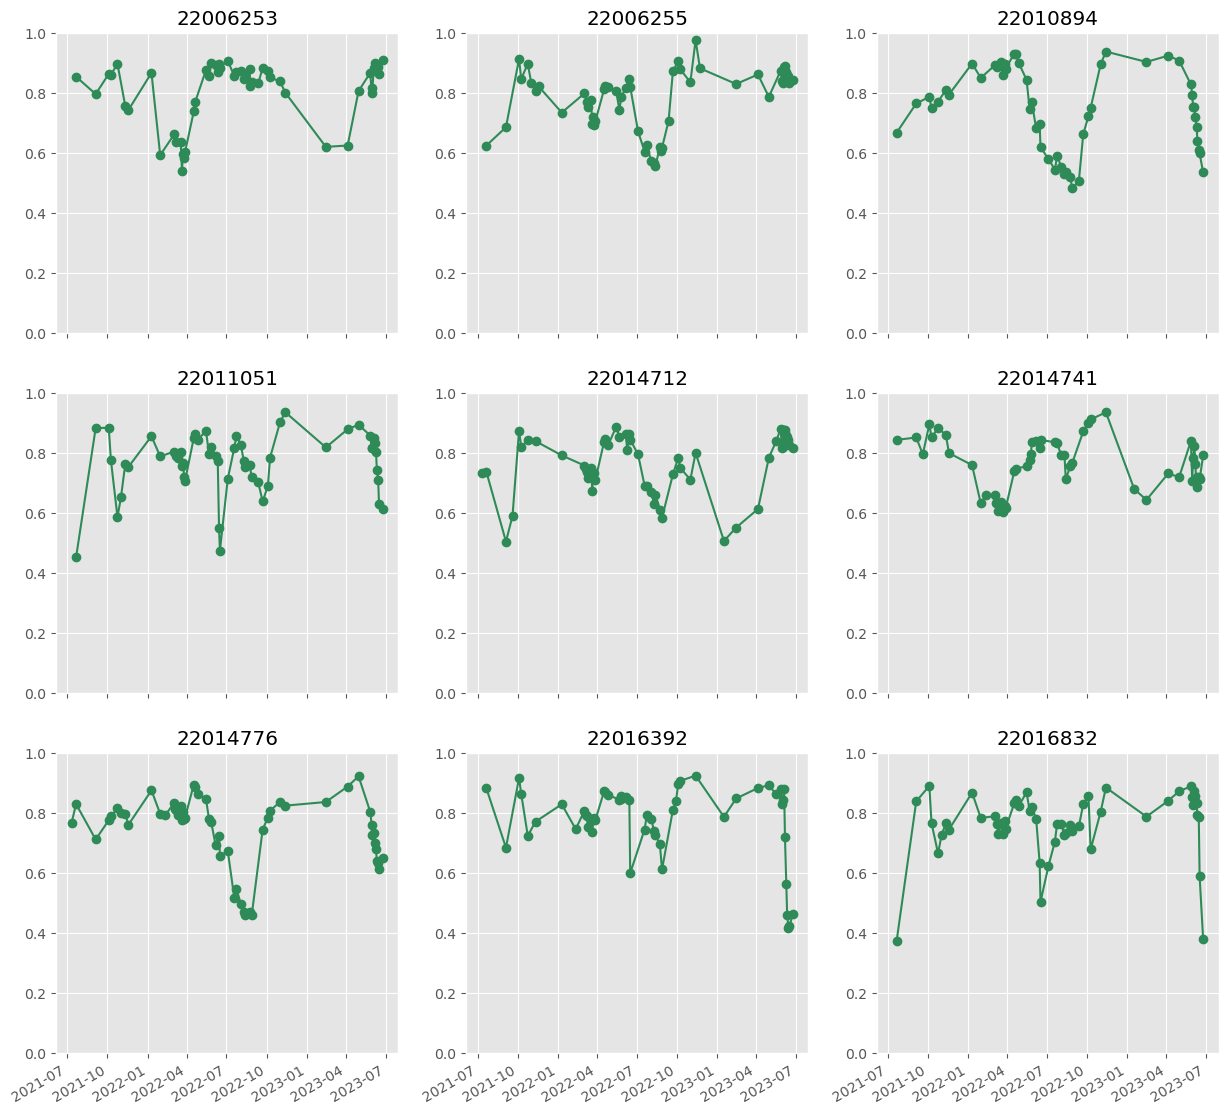

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15), sharex=True) 
axes = axes.flatten()
for i, (perc_info, c) in enumerate(dap):
    df = c.sentinel2_reflectance_values
    axes[i].plot_date(df.index, df.NDVI, linestyle="-", marker="o", color="seagreen")
    axes[i].set_title(perc_info.fieldID)
    axes[i].set_ylim(0,1)
fig.autofmt_xdate()
    

# Available datasets
grompy can provide access to several datasets simultaneously. The available datasets can be found with `dap.datasets`

In [15]:
dap.datasets

['sentinel2_reflectance_std', 'sentinel2_reflectance_values']

## Enabling/disabling datasets
Datasets can be enabled/disabled with `dap.enable(<dataset_name>)` or `dap.disable(<dataset_name>)`

In [ ]:
dap.disable('sentinel1_backscatter')
print(f"Datasets enabled: {dap.datasets_enabled}")
dap.enable('sentinel1_backscatter')
print(f"Datasets enabled: {dap.datasets_enabled}")


## Time to access a parcel
Let's test how fast grompy can access the data

In [18]:
limit=50
dap = grompy.DataAccessProvider(grompy_yaml, limit=limit)
print(dap.datasets_enabled)
t1 = time.time()
for perc_info, c in dap:
    pass
elapsed = time.time() - t1
print(f"Accessing {limit} parcels took {elapsed/limit:6.3} seconds per parcel.")

{'sentinel2_reflectance_values', 'sentinel2_reflectance_std'}
Accessing 50 parcels took 0.0138 seconds per parcel.


As you can see grompy can access the sentinel2 + sentinel1 data in about ~0.018 seconds per parcel. You numbers may vary depending on the speed of the underlying hardware.

# Disabling datasets matters

However, disabling certain datasets makes it even faster. If we are only interested in sentinel2 data we can disable the others and have quicker access:

In [19]:
limit=50
dap = grompy.DataAccessProvider(grompy_yaml, limit=limit)
dap.disable('sentinel2_reflectance_std')
print(dap.datasets_enabled)
t1 = time.time()
for perc_info, c in dap:
    pass
elapsed = time.time() - t1
print(f"Accessing {limit} parcels took {elapsed/limit:6.3} seconds per parcel.")

{'sentinel2_reflectance_values'}
Accessing 50 parcels took 0.0103 seconds per parcel.


In this case, only ~0.006 seconds/parcel was needed!

In [21]:
c.sentinel2_reflectance_values.head(25)

day    B02     B03     B04     B05     B06     B07     B08  \
day                                                                             
2021-07-21  2021-07-21  436.0   798.0   605.0  1446.0  3592.0  4245.0  4406.0   
2021-09-04  2021-09-04  559.0   897.0   549.0  1355.0  3735.0  4505.0  4505.0   
2021-10-04  2021-10-04  363.0   721.0   460.0  1290.0  3423.0  4074.0  4025.0   
2021-10-09  2021-10-09  364.0   743.0   489.0  1249.0  3218.0  3706.0  3643.0   
2021-10-24  2021-10-24  277.0   629.0   458.0  1225.0  2910.0  3448.0  3538.0   
2021-11-11  2021-11-11   87.0   313.0   274.0   590.0  1181.0  1350.0  1485.0   
2021-11-18  2021-11-18  118.0   473.0   453.0  1010.0  1760.0  2007.0  2037.0   
2022-01-10  2022-01-10  382.0   398.0   330.0   550.0   741.0   783.0   876.0   
2022-01-30  2022-01-30  458.0   698.0   715.0  1186.0  1638.0  1815.0  2024.0   
2022-03-03  2022-03-03  689.0  1015.0  1147.0  1798.0  2495.0  2747.0  3131.0   
2022-03-06  2022-03-06  781.0  1085.0  1219.0  1888.0  2564.0  2864.0  3242.0   
2022-03-08  2022-03-08  683.0  1066.0  1267.0  1922.0  2538.0  2800.0  3102.0   
2022-03-18  2022-03-18  709.0  1081.0  1322.0  1946.0  2687.0  2999.0  3345.0   
2022-03-21  2022-03-21  764.0  1090.0  1251.0  1870.0  2574.0  2831.0  3039.0   
2022-03-23  2022-03-23  851.0  1160.0  1356.0  1970.0  2766.0  3069.0  3418.0   
2022-03-26  2022-03-26  817.0  1120.0  1259.0  1855.0  2657.0  2983.0  3297.0   
2022-03-28  2022-03-28  765.0  1156.0  1317.0  1946.0  2897.0  3229.0  3520.0   
2022-04-17  2022-04-17  581.0   976.0   902.0  1624.0  3121.0  3520.0  3834.0   
2022-04-20  2022-04-20  536.0   892.0   798.0  1526.0  3065.0  3512.0  3759.0   
2022-04-27  2022-04-27  610.0   977.0   777.0  1573.0  3598.0  4167.0  4380.0   
2022-05-22  2022-05-22  516.0   834.0   553.0  1278.0  3605.0  4442.0  4608.0   
2022-05-27  2022-05-27  482.0   840.0   478.0  1300.0  3936.0  4746.0  4843.0   
2022-06-06  2022-06-06    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2022-06-11  2022-06-11  585.0   892.0   522.0  1367.0  3884.0  4784.0  4843.0   
2022-06-14  2022-06-14  343.0   640.0   365.0  1085.0  3157.0  3921.0  4156.0   

               B11     B12     B8A    NDVI sensor  sensor_zenith  \
day                                                                
2021-07-21  2395.0  1180.0  4731.0  0.7604    S2A            2.6   
2021-09-04  2566.0  1275.0  4938.0  0.7827    S2B            2.6   
2021-10-04  2384.0  1213.0  4615.0  0.7966    S2B            2.6   
2021-10-09  2111.0  1062.0  4161.0  0.7621    S2A            2.6   
2021-10-24  1984.0   997.0  3995.0  0.7741    S2B            2.6   
2021-11-11   855.0   480.0  1591.0  0.6933    S2A           10.9   
2021-11-18  1289.0   755.0  2382.0  0.6416    S2A            2.6   
2022-01-10   368.0   239.0   923.0  0.4443    S2A           10.9   
2022-01-30  1532.0   958.0  2107.0  0.4799    S2A           10.9   
2022-03-03  3370.0  2274.0  3188.0  0.4645    S2B            2.6   
2022-03-06  3357.0  2222.0  3266.0  0.4546    S2B           10.9   
2022-03-08  3515.0  2355.0  3182.0  0.4214    S2A            2.6   
2022-03-18  3280.0  2123.0  3459.0  0.4366    S2A            2.6   
2022-03-21  3022.0  1956.0  3246.0  0.4204    S2A           10.9   
2022-03-23  3632.0  2427.0  3501.0  0.4361    S2B            2.6   
2022-03-26  3385.0  2200.0  3377.0  0.4516    S2B           10.9   
2022-03-28  3499.0  2224.0  3654.0  0.4599    S2A            2.6   
2022-04-17  3144.0  1843.0  3944.0  0.6236    S2A            2.6   
2022-04-20  2842.0  1598.0  3879.0  0.6554    S2A           10.9   
2022-04-27  2954.0  1610.0  4570.0  0.7020    S2A            2.6   
2022-05-22  2483.0  1293.0  4750.0  0.7860    S2B            2.6   
2022-05-27  2100.0   966.0  5108.0  0.8204    S2A            2.6   
2022-06-06     NaN     NaN     NaN  0.8292    S2A            2.6   
2022-06-11  2604.0  1272.0  5187.0  0.8046    S2B            2.6   
2022-06-14  2153.0  1006.0  4298.0  0.8381    S2B           10.